# The Skyline

In [207]:
#Importamos las librerias necesarias
#Elaborado y diseñado por Brayan Quirino
#18 de septiembre 2020
import matplotlib.pyplot as plt
import pylab
import numpy as np
from random import randrange

In [208]:
build_number=5 #build_names # Numero de edificios
rango=31 # tamaño de escala de los edificios
edges=[]
#edges variable para definir los bordes (paredes y techos)

## Creamos edificios aleatorios de acuerdo a build_number

In [209]:
edges=[];
for i in range(build_number):
    #build- variable que crea un nuevo edificio aleatorio
    build = {
      "x1": randrange(rango-5),
      "x2": 0,
      "h": randrange(5,rango),
      "name": "s"
    }
    build["x2"]=randrange(build["x1"]+1,rango)
    build["name"]=build_names[i]
    build["p1"]=[build["x1"],0]
    build["p2"]=[build["x2"],0]
    build["p3"]=[build["x1"],build["h"]]
    build["p4"]=[build["x2"],build["h"]]
    edges.append(build);

## Obtenemos las esquinas superiores de los edificios

* Obtenemos el par de cordenadas de los techos de los edificios (x1,y1) y (x2,y2)
* Les colocamos 's' si son el principio del techo de izquierda a derecha.
* Les colocamos 'e' si son el final del techo

In [210]:
x1s=[]
x2s=[]
for i in edges:
    x1s.append([i["x1"],i["h"],"s"])
    x2s.append([i["x2"],i["h"],"e"])
x1s.extend(x2s)
x2s=sorted(x1s)
aux=[]
for i in range(len(x2s)):
    for j in range(i+1,len(x2s)):
        if(x2s[i][0]==x2s[j][0]):
            if(x2s[i][1]<x2s[j][1]):
                aux=x2s[i]
                x2s[i]=x2s[j]
                x2s[j]=aux
print(x2s)
#Ordenados en terminos de x, inicio y fin

[[1, 12, 's'], [7, 26, 's'], [9, 8, 's'], [10, 23, 's'], [11, 12, 'e'], [18, 26, 'e'], [21, 9, 's'], [21, 8, 'e'], [27, 23, 'e'], [29, 9, 'e']]


# Algoritmo Skylines que nos da los key points

In [211]:
#Algoritmo de salida
walls=[]
walls.append(0)
output=[]
#print(walls)
maxv=np.max(walls)
for i in x2s:
    if(maxv==0):
        if(i[2]=='s'):
            walls.append(i[1])
            if(i[1]>maxv):
                maxv=np.max(walls)
                output.append((i[0],i[1]))
    else:
        if(i[2]=='s'):
            walls.append(i[1])
            if(i[1]>maxv):
                maxv=np.max(walls)
                output.append((i[0],i[1]))
        else:
            walls.remove(i[1])
            aux=maxv
            maxv=np.max(walls)
            if(maxv!=aux):
                output.append((i[0],maxv))
print(output)

[(1, 12), (7, 26), (18, 23), (27, 9), (29, 0)]


## Obtenemos todos los puntos de la silueta en orden secuencial

In [212]:
allpoints=[]
allpoints.append((output[0][0],0))
for i in range(0,len(output)-1):
    allpoints.append(output[i])
    allpoints.append((output[i+1][0],output[i][1]))
allpoints.append(output[-1])
print(allpoints)

[(1, 0), (1, 12), (7, 12), (7, 26), (18, 26), (18, 23), (27, 23), (27, 9), (29, 9), (29, 0)]


In [213]:
#Formateo de datos para poder graficar
x=[]
y=[]
px=[]
py=[]
for i in output:
    x.append(i[0])
    y.append(i[1])
for i in allpoints:
    px.append(i[0])
    py.append(i[1])

In [214]:
import random
import matplotlib.patches as patches
from matplotlib.path import Path
#Funcion para generar colores aleatorios
def random_color():
    import random
    r = lambda: random.randint(0,255)
    return('#%02X%02X%02X' % (r(),r(),r()))
#Funcion que "crea" los edificios graficamente
def make_4vertex(ax):
    for i in edges:
        verts=[
                i["p1"],
                i["p2"],
                i["p4"],
                i["p3"],
                i["p1"],
        ]

        codes = [
            Path.MOVETO,
            Path.LINETO,
            Path.LINETO,
            Path.LINETO,
            Path.CLOSEPOLY,
        ]

        path = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=random_color(), lw=2)
        ax.add_patch(patch)

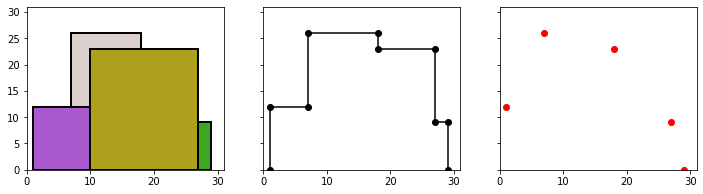

In [215]:
import matplotlib.patches as patches
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
make_4vertex(ax[0])
#make_2vertex(p1,p2,ax[1])
ax[0].set_xlim(0, 31)
ax[0].set_ylim(0, 31)
ax[2].set_xlim(0, 31)
ax[2].set_ylim(0, 31)
ax[2].scatter(x,y,color="red")
ax[1].set_xlim(0, 31)
ax[1].set_ylim(0, 31)
ax[1].plot(px,py, marker='o',color="black")
plt.show()

In [206]:
print(output)

[(0, 6), (2, 28), (4, 6), (6, 26), (29, 0)]
